# 1. Initial Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Reading the CSV file

In [2]:
df = pd.read_csv("ai_job_dataset.csv")

# 3. Removing Empty Values And Filtering Data

In [3]:
df_cleaned = df.dropna()
filter = df_cleaned['salary_currency']=='USD'
df_cleaned = df_cleaned[filter]

# 4. Unpivoting Data

In [4]:
df_melt = df_cleaned.melt(
    id_vars="company_location",
    value_vars="salary_usd",
    var_name="salaries"
)

# 5. Pivoting Data

In [5]:
df_pivot = df_melt.pivot_table(
    index="company_location",
    columns="salaries",
    aggfunc=['mean', 'min', 'max']
)

# 6. Sorting Data

In [6]:
df_ascending_mean = df_pivot.sort_values(by=('mean', 'value', 'salary_usd'), ascending=True)
df_ascending_max = df_pivot.sort_values(by=('max', 'value', 'salary_usd'), ascending=True)
df_ascending_min = df_pivot.sort_values(by=('min', 'value', 'salary_usd'), ascending=True)

# 7. Settings For Plotting A Horizontal Bar Chart

In [7]:
n_items = len(df_pivot.index)
y_pos = np.arange(n_items)
bar_height1 = 0.8
bar_height2 = 0.3
colors = plt.cm.Dark2.colors

# 8. Plotting A Horizontal Bar Chart

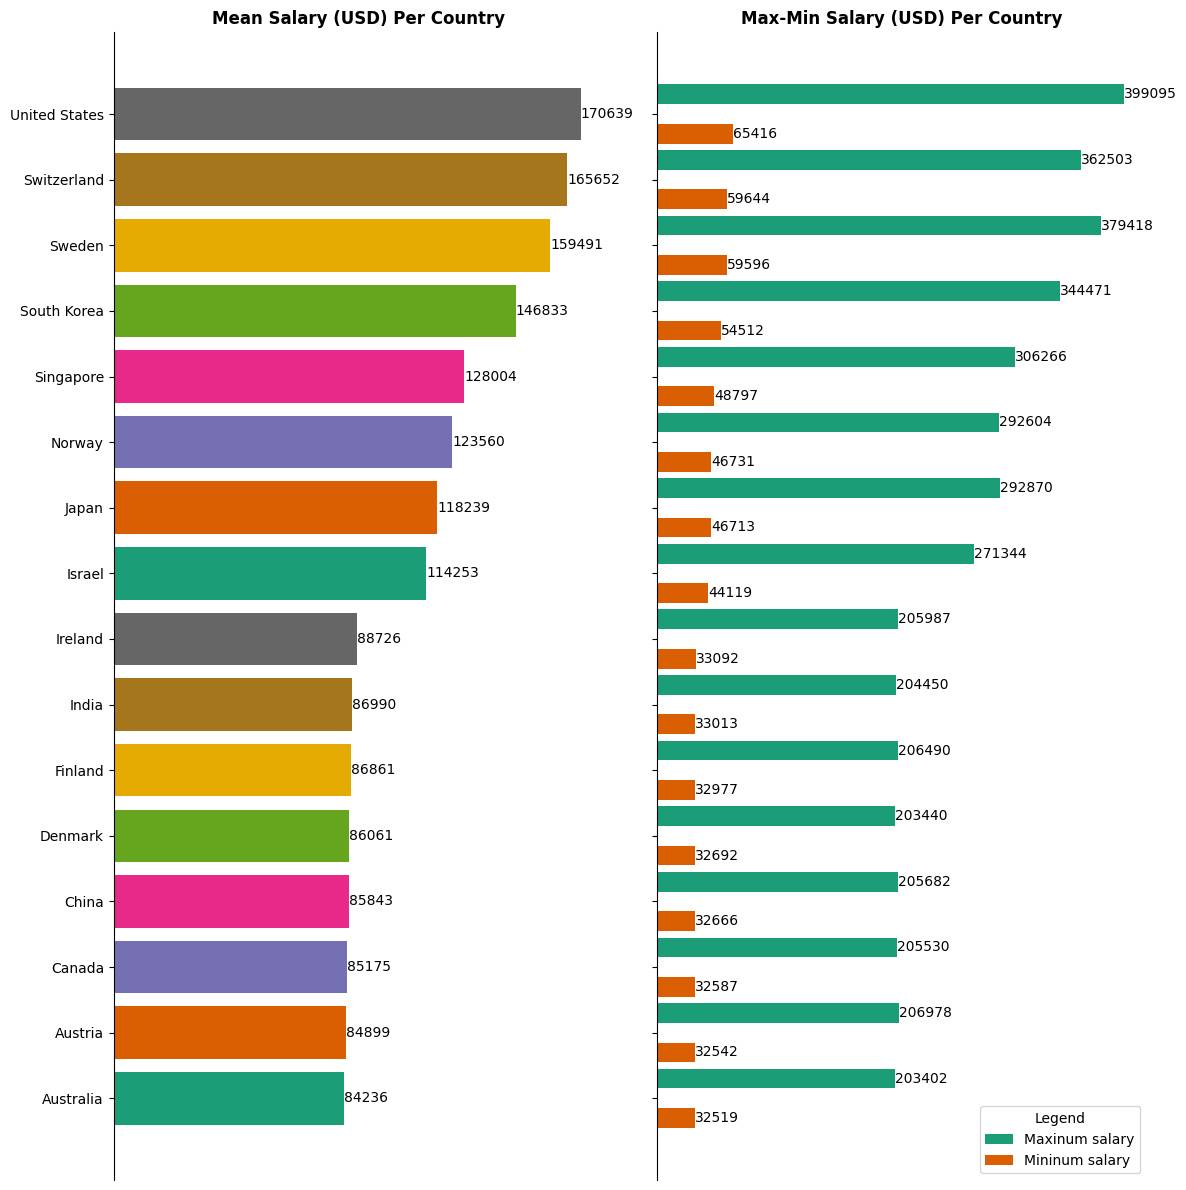

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 12), sharey=True)

bars_mean = ax[0].barh(y_pos, df_ascending_mean['mean']['value']['salary_usd'], bar_height1, color=colors)

ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(df_pivot.index)
ax[0].bar_label(bars_mean, fmt="%.0f")
ax[0].spines[['top', 'right', 'bottom']].set_visible(False)
ax[0].xaxis.set_visible(False)
ax[0].set_title("Mean Salary (USD) Per Country", fontweight="bold")

bars_max = ax[1].barh(y_pos + bar_height2, df_ascending_min['max']['value']['salary_usd'], bar_height2, label="Maxinum salary", color=colors[0])
bars_min = ax[1].barh(y_pos - bar_height2, df_ascending_min['min']['value']['salary_usd'], bar_height2, label="Mininum salary", color=colors[1])

ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(df_pivot.index)
ax[1].bar_label(bars_max, fmt="%.0f")
ax[1].bar_label(bars_min, fmt="%.0f")
ax[1].spines[['top', 'right', 'bottom']].set_visible(False)
ax[1].xaxis.set_visible(False)
ax[1].set_title("Max-Min Salary (USD) Per Country", fontweight="bold")
ax[1].legend(title="Legend")

plt.tight_layout()
plt.show()